# EECS 4422 Assignment 2

Jimmy Le<br>
216143992<br>
Prof. Kosta Derpanis<br>
EECS4422 W2023

## Tasks:

o Implement Canny Edge Detector<br>
o Implement Seam Carving<br>

## References

Code Process and Method: EECS4422 Class Lectures + Slides<br>
Pedro Felzenzwab Edge Detection Handout: https://drive.google.com/file/d/0Bz1dfcnrpXM-QVpHZ1p6SUxoaXM/view?resourcekey=0-aYFhFiQTvM4x5CbfN5gllg<br>
Seam Carving (Avidan et al.) Handout: https://drive.google.com/file/d/0Bz1dfcnrpXM-UEktLUJOeVhJN1U/view?resourcekey=0-cqsu3QzKIlxL-PRLNkHEGQ<br>
Kornia Documentation: https://kornia.readthedocs.io/en/latest/filters.html<br>
Pytorch Documentation: https://pytorch.org/docs/stable/index.html<br>
Torch.squeeze/Torch.unsqeeze help: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/<br>
OpenCV for image reading/adjustment: https://docs.opencv.org/3.4/d2/de8/group__core__array.html<br>
Subplots for matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html<br>

To Demonstrate full understanding of the code, full documentation and explaination of the code will be provided.

## Next Steps

o Due to time constraints, implementation of NonMaxSupression and Hysteresis was not complete (3 midterms!!)<br>
&emsp;o Psuedocode and partial implementation and explainations has been provided to demonstrate knowledge and best attempt at creating the function<br>
o Create seam carving expansion<br>
&emsp;o Similar to before, the implementation of seam expansion was partially implemented. Some code has been provided as best approximation!!<br>
o Ask Matt the TA to go easy on me :'))<br>
o Ask Matt the TA which is his favourite Spider-Man




## Import Libraries

In [317]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import cv2
import torch
import torch.nn as nn
import os
import kornia
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #Prevents an unusual error where displaying images will crash the kernel?
#rcParams['figure.figsize'] = 11,8
plt.gray() #Ensures greyscale images are displayed gray without having to use cmap parameter

<Figure size 432x288 with 0 Axes>

## Functions

In [318]:
#Displays Tensors as image
def imshowTorch(input):
    image = kornia.tensor_to_image(input) #Converts to HWC format
    plt.imshow(image) #As matplotlib requires arrays 

In [319]:
#Converts numpy arrays to Kornia compatable tensors
def toKornia(img):
    print(img.shape)
    img = kornia.image_to_tensor(img) #Kornia in shape BCHW
    print(img.shape)
    #Adding in dummy axis from: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/
    img = torch.unsqueeze(img, dim=0)
    print(img.shape)
    return img

In [320]:
#Converts images to grayscale
# Implented during in class labs
def img2grayscale(img):
    img = img.astype(np.float32)/255
    img = (img[:,:,0]+ img[:,:,1]+ img[:,:,2]) / 3

    return img

In [321]:
#Non-max supression implementation
#Since I have not created it and due to time constraints, my best imagined implementation for non-max surpression as pseudocode is as follows
#We know the gradient orientation and pixels only have an '8 neighbor' formation
#Meaning that the direction of the edges can only be in one of 8 angles from the neighbor
def NonMaxSupression(magnitude, orientation):

    #Get pixel dimensions from magnitude dimensions
    #(h,w) = magnitude.shape[:2]

    #Init result as an array of zeros
    #result = zeros_like(magnitude) 
    
    #We check our pixel neighbors knowing the angle from the gradient orientation (provided as an arg)
    #foreach row of pixels
    #   foreach column of pixels
    #       if angle(horizontal)
    #           #Check 
    #       if angle(vertical)
    #           #Check 
    #       if angle(diagonal)
    #           #Check 
    
    #When we complete our check, we esentially say, alright is this pixel a higher intensity or lower intensity (closer to 255)
    #If the neighbor is larger (closer to 255) we keep that
    #And surpress the current zero (set to 0, black)

    return 0

In [322]:
#Q1.1
def MyCanny(img, sigma, tau):
    
    #GaussianBlur2D from https://kornia.readthedocs.io/en/latest/filters.html
    gauss = kornia.filters.GaussianBlur2d((3, 3), (sigma, sigma))

    img_blur = gauss(img)

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    #By default 1st order derivative and 'diff' derivative modality
    gradient = kornia.filters.spatial_gradient(img_blur)

    #Find magnitude and 1st order derivatives https://kornia-tutorials.readthedocs.io/en/latest/filtering_edges.html
    #   and edges-pff document given in A2 document: https://drive.google.com/file/d/0Bz1dfcnrpXM-QVpHZ1p6SUxoaXM/view?resourcekey=0-aYFhFiQTvM4x5CbfN5gllg
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)
    img_grad_or = torch.arctan2(grad_x, grad_y) #Also from lecture 6

    #Matplotlib subplots from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    fig, ax = plt.subplots(1,3, figsize=(30,30))
    ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
    ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))

    #Call NonMaxSupression here, see explaination above :"))
    #NonMaxSupression()

    #Threshold grad magnitude above given tau
    img_grad_mag = img_grad_mag / img_grad_mag.max() * 255
    img_grad_mag = img_grad_mag > tau
    ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return 0

    

In [323]:
#Q1.2
def MyCannyFull(img, sigma, tau, low, high):
    
    #GaussianBlur2D from https://kornia.readthedocs.io/en/latest/filters.html
    gauss = kornia.filters.GaussianBlur2d((3, 3), (sigma, sigma))

    img_blur = gauss(img)

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    #By default 1st order derivative and 'diff' derivative modality
    gradient = kornia.filters.spatial_gradient(img_blur)

    #Find magnitude and 1st order derivatives https://kornia-tutorials.readthedocs.io/en/latest/filtering_edges.html
    #   and edges-pff document given in A2 document: https://drive.google.com/file/d/0Bz1dfcnrpXM-QVpHZ1p6SUxoaXM/view?resourcekey=0-aYFhFiQTvM4x5CbfN5gllg
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)
    img_grad_or = torch.arctan2(grad_x, grad_y) #From Lecture 6 (edge detection)

    #Matplotlib subplots from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    fig, ax = plt.subplots(1,3, figsize=(30,30))
    ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
    ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))

    #Call NonMaxSupression here, see explaination above :"))
    #NonMaxSupression()

    #Threshold
    img_grad_mag = img_grad_mag / img_grad_mag.max() * 255
    
    #Apply hysteresis here

    #img_grad_mag = img_grad_mag > tau
    ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return 0

    

In [324]:
def findEnergy(img, showimg=True):

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    # Using 'sobel' 
    # output = kornia.filters.sobel(img)
    # imshowTorch(output)
    
    #Compute gradient like in MyCanny
    gradient = kornia.filters.spatial_gradient(img)
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)

    
    if showimg == True:
        fig, ax = plt.subplots(1,3, figsize=(30,30))
        ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
        ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))
        ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return img_grad_mag

In [325]:
def findMin(m, i, j):
    
    #Initilize return values
    result, index = (0,0)
    
    #Ordered arrays storing [value,y,x]
    #  Init 'value' to a very very very large number
    #  so when checking the border of images they do not
    #  Think it is a potential min value
    topLeft = [10000000,i-1,j-1]
    topMiddle = [1000000, i-1, j]
    topRight = [10000000, i-1,j+1]

    #Assign arrays to respective neighboring pixels
    if i == 0: #Very first row
        result = m[i,j]
    elif j == 0: #Left border
        topMiddle[0] = m[topMiddle[1],topMiddle[2]]
        topRight[0] = m[topRight[1],topRight[2]]
    elif j == (m.shape[1] - 1): #Right border
        topLeft[0] = m[topLeft[1],topLeft[2]] 
        topMiddle[0] = m[topMiddle[1],topMiddle[2]]
    else: #Default case
        topLeft[0] = m[topLeft[1],topLeft[2]] 
        topMiddle[0] = m[topMiddle[1],topMiddle[2]]
        topRight[0] = m[topRight[1],topRight[2]]
    
    #Get lowest value and x index
    output = min([topLeft, topMiddle, topRight], key = lambda t: t[0])

    #Ditto
    result = output[0]
    index = output[2]   
    #print(topLeft, topMiddle, topRight, result, index)
    return result, index

In [328]:
#Q2: Carving Helper for MySeamCarving method
def CarvingHelper(img):
    #Find dimensions of image
    (h,w) = img.shape[:2]
    #seam, m = findPath(img,m)


    #(h, w) = m.shape[2:]
    #Q2a,b,c compute energy image, create scoring matrix
    #  Set values to match those of energy image
    york_k = toKornia(img)
    M = findEnergy(york_k, showimg=False)
    m = kornia.tensor_to_image(M)
    m = m.sum(axis=2)

    (h,w) = img.shape[:2]
    #result, index = (0,0)
    seam = np.zeros_like(m) #Init seam path 

    #Q2d, e
    # Find the minimum energy and score it
    for i in range(1, h):
        for j in range(0, w):
            min, seam[i,j] = findMin(m,i,j)
            m[i,j] += min
            

    #Init mask to remove seam
    mask = np.ones((h,w), dtype=bool)
    j = np.argmin(m[-1])

    #Q2e,f,g
    #Determine mask by going buttom up
    for i in reversed(range(h)):
        mask[i, j] = False
        j = int(seam[i, j])
        # mask[i, j-1] = False
        # j = int(seam[i, j-1])

    #Remove seam by checking mask
    mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((h, w - 1, 3))

    return img

In [329]:
#Q2: Seam carving function
def MySeamCarving(img, newWidth, newHeight):
    #Height and width of new image
    (h,w) = img.shape[:2]
    img_adjusted = img.copy() #Get copy of input image
    #print(type(img_adjusted))

    #Remove seams vertically until desired width
    # Q2.a,b,c,d,f,g,h
    for i in range(w - newWidth):
        img_adjusted = CarvingHelper(img_adjusted)
    
    #Transpose to work horizontally
    img_adjusted = cv2.transpose(img_adjusted)

    #Remove seams (for the image horizontal) until desired height
    # Q2.a,b,c,d,f,g,h for horizontal direction
    for i in range(h - newHeight):
        img_adjusted = CarvingHelper(img_adjusted)
    img_adjusted = cv2.transpose(img_adjusted)
    plt.imshow(img_adjusted)

    return 0

In [354]:
#Q2: Expanding Helper for MySeamExpander method
def ExpanderHelper(img):
    #Find dimensions of image
    (h,w) = img.shape[:2]
    #seam, m = findPath(img,m)


    #(h, w) = m.shape[2:]
    #Q2a,b,c compute energy image, create scoring matrix
    #  Set values to match those of energy image
    york_k = toKornia(img)
    M = findEnergy(york_k, showimg=False)
    m = kornia.tensor_to_image(M)
    m = m.sum(axis=2)

    (h,w) = img.shape[:2]
    #result, index = (0,0)
    seam = np.zeros_like(m) #Init seam path 

    #Q2d, e
    # Find the minimum energy and score it
    for i in range(1, h):
        for j in range(0, w):
            min, seam[i,j] = findMin(m,i,j)
            m[i,j] += min
            

    #Init mask to remove seam
    mask = np.ones((h,w), dtype=bool)
    j = np.argmin(m[-1])

    #Q2e,f,g
    #Determine mask by going bottom up
    for i in reversed(range(h)):
        mask[i, j] = False
        j = int(seam[i, j])
        # mask[i, j-1] = False
        # j = int(seam[i, j-1])

    #Here instead of removing our seam with our determined mask
    # We instead duplicate our seam (that is, the seam with the least energy)
    # This is also suggested in:
    # https://drive.google.com/file/d/0Bz1dfcnrpXM-UEktLUJOeVhJN1U/view?resourcekey=0-cqsu3QzKIlxL-PRLNkHEGQ
    #mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((h, w + 1, 3)) #Expand one row instead

    return img

In [355]:
#Q2.2: Seam expanding function
#   Function below is my best guess at how to implement a seam expander
#   Due to time constraints I will not be able to fully implement
def MySeamExpander(img, newWidth, newHeight):
    #Height and width of new image
    (h,w) = img.shape[:2]
    img_adjusted = img.copy() #Get copy of input image
    #print(type(img_adjusted))

    #Expand seams vertically until desired width
    # Q2.a,b,c,d,f,g,h
    for i in range(abs(w - newWidth)):
        img_adjusted = CarvingHelper(img_adjusted)
    
    #Transpose to work horizontally
    img_adjusted = cv2.transpose(img_adjusted)

    #Expand seams (for the image horizontal) until desired height
    # Q2.a,b,c,d,f,g,h for horizontal direction
    for i in range(abs(h - newHeight)):
        img_adjusted = CarvingHelper(img_adjusted)
    img_adjusted = cv2.transpose(img_adjusted)
    plt.imshow(img_adjusted)

    return 0

### Question 1

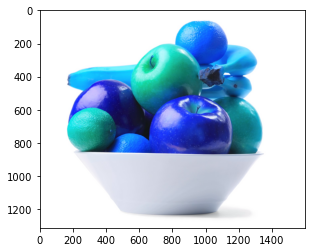

In [330]:
#Read in fruit img
fruit = cv2.imread('bowl-of-fruit.jpg')
plt.imshow(fruit)

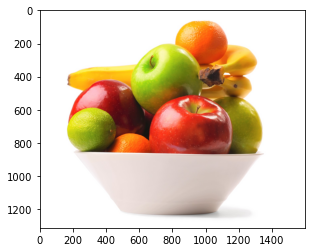

In [331]:
#Convert to rgb
fruit = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)
plt.imshow(fruit)

In [332]:
#Convert to Grayscale
#fruit_gr = fruit.astype(np.float32)/255
#fruit_gr = (fruit_gr[:,:,0]+ fruit_gr[:,:,1]+ fruit_gr[:,:,2]) / 3
#fruit_gr = cv2.cvtColor(fruit, cv2.COLOR_RGB2GRAY)
fruit_gr = img2grayscale(fruit)

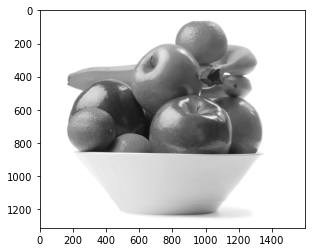

In [333]:
#Greyscale img result
plt.imshow(fruit_gr)

In [334]:
#Conversion to torch tensor for kornia
fruit_k = toKornia(fruit_gr)

(1312, 1600)
torch.Size([1, 1312, 1600])
torch.Size([1, 1, 1312, 1600])


In [335]:
type(fruit_k)

torch.Tensor

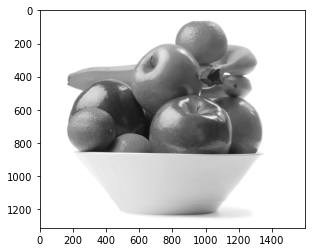

In [336]:
#Show image as torch tensor
imshowTorch(fruit_k)

0

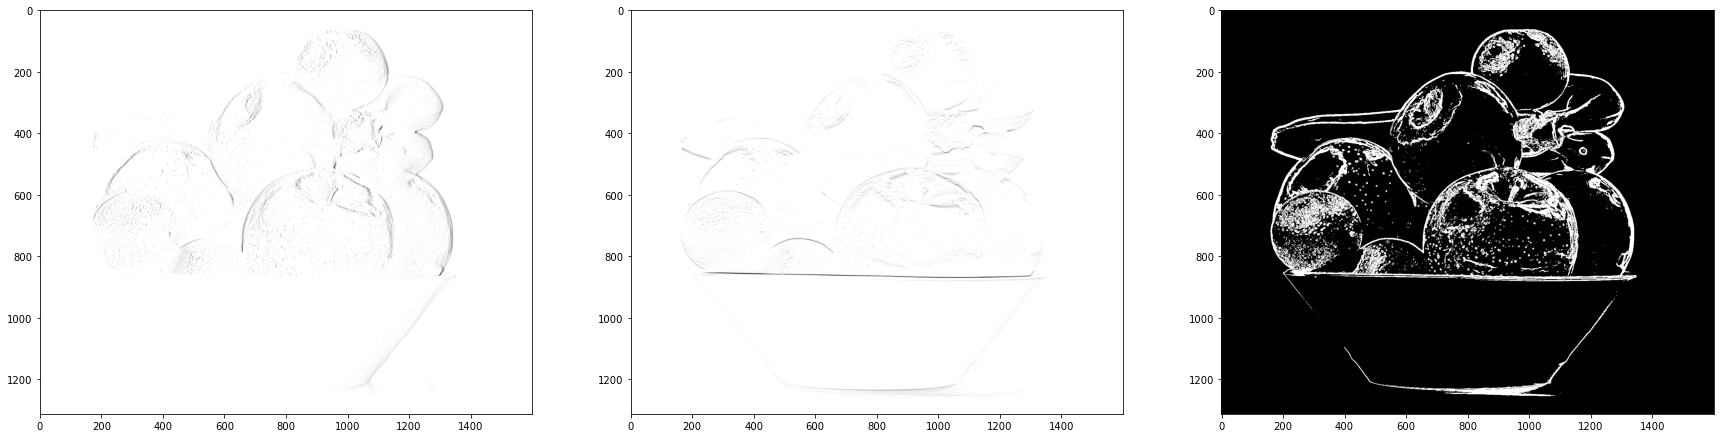

In [337]:
#Display (from left to right) x grad, y grad, and the resultant edge detection
MyCanny(fruit_k, 1.5, 11)

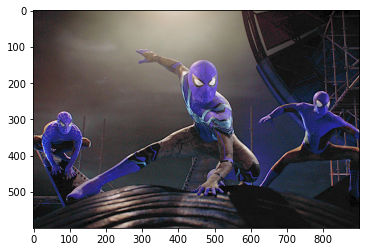

In [338]:
#Read in spiderman image
spidey = cv2.imread('Spider-Man-No-Way-Home-triple-threat.jpg')
plt.imshow(spidey)

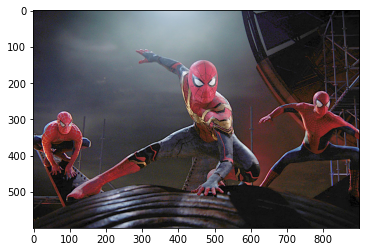

In [339]:
#Conversion to RGB 
spidey = cv2.cvtColor(spidey, cv2.COLOR_BGR2RGB)
plt.imshow(spidey)

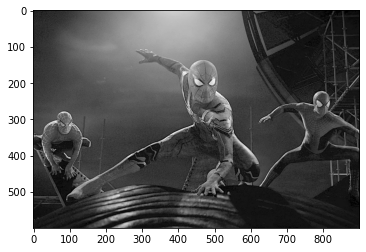

In [340]:
#Greyscale
spidey_gr = img2grayscale(spidey)
plt.imshow(spidey_gr)

In [341]:
#Convert to torch tensor
spidey_k = toKornia(spidey_gr)

(600, 900)
torch.Size([1, 600, 900])
torch.Size([1, 1, 600, 900])


In [342]:
type(spidey_k)

torch.Tensor

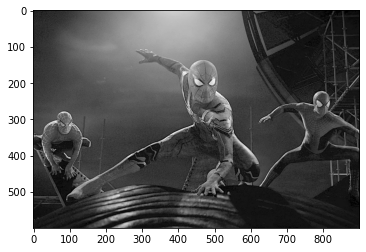

In [343]:
imshowTorch(spidey_k)

0

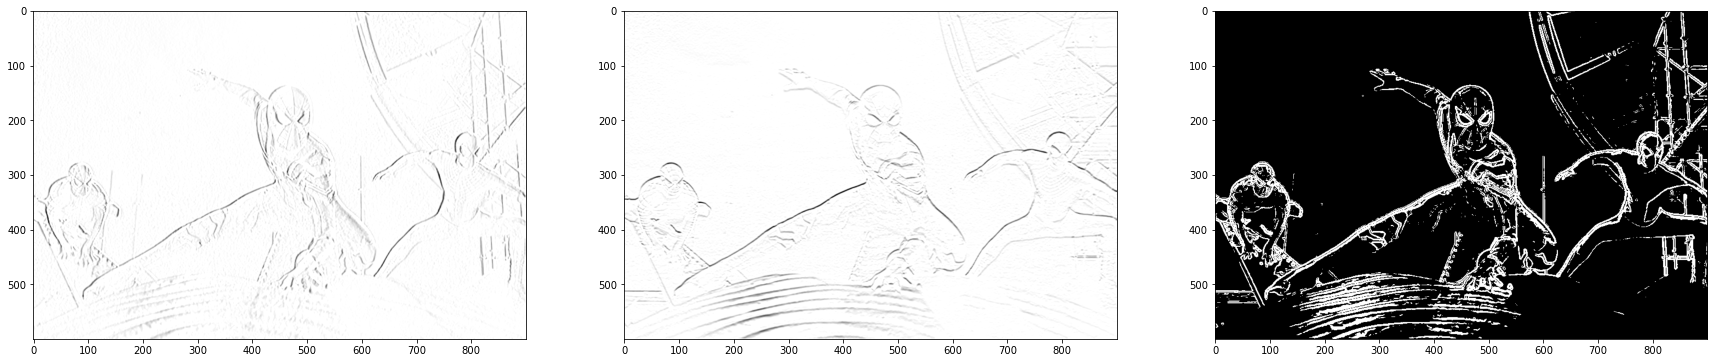

In [344]:
#Display (left to right) x grad, y grad, Canny edge detector output
MyCanny(spidey_k, 1.5, 30)

### Question 2

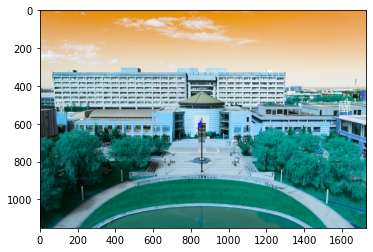

In [345]:
york = cv2.imread('York.jpg') #Read in provided yorku image for q2
plt.imshow(york)

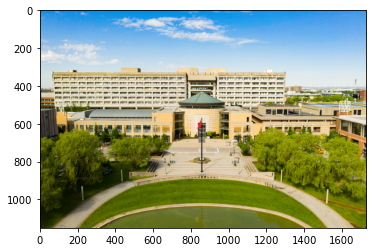

In [346]:
york = cv2.cvtColor(york, cv2.COLOR_BGR2RGB) #To RGB
plt.imshow(york)

(1151, 1728, 3)
torch.Size([3, 1151, 1728])
torch.Size([1, 3, 1151, 1728])


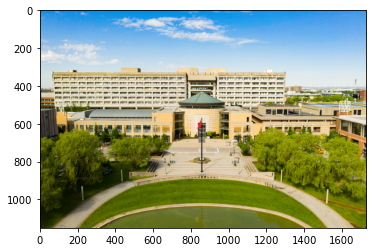

In [347]:
#Adjust york image to be compatable with tensor operations (requires floats)
york = york.astype(np.float32)/255
york_k = toKornia(york)
imshowTorch(york_k)

In [348]:
spidey = spidey.astype(np.float32)/255 
#Adjust spidey image to be compatable with tensor operations (requires floats)

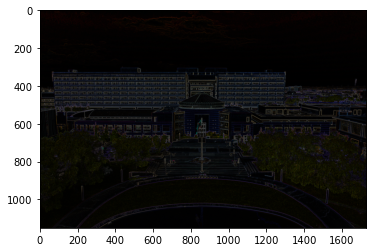

In [349]:
imshowTorch(kornia.filters.sobel(york_k)) #Verify expected output

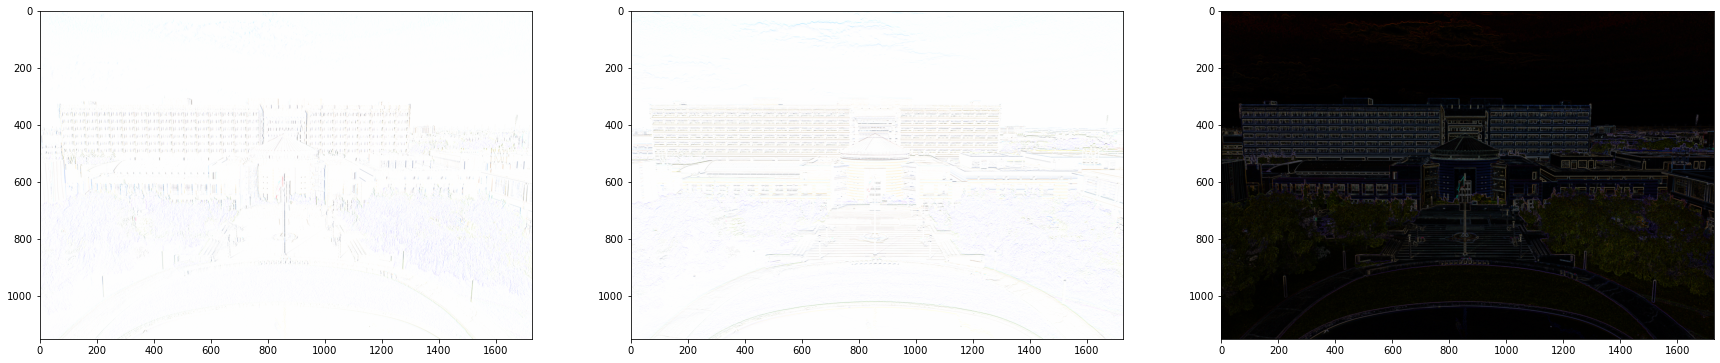

In [350]:
M = findEnergy(york_k) #Our output (with our created function)
#a,b,c

(1151, 1728, 3)
torch.Size([3, 1151, 1728])
torch.Size([1, 3, 1151, 1728])
(1151, 1727, 3)
torch.Size([3, 1151, 1727])
torch.Size([1, 3, 1151, 1727])
(1151, 1726, 3)
torch.Size([3, 1151, 1726])
torch.Size([1, 3, 1151, 1726])
(1151, 1725, 3)
torch.Size([3, 1151, 1725])
torch.Size([1, 3, 1151, 1725])
(1151, 1724, 3)
torch.Size([3, 1151, 1724])
torch.Size([1, 3, 1151, 1724])
(1151, 1723, 3)
torch.Size([3, 1151, 1723])
torch.Size([1, 3, 1151, 1723])
(1151, 1722, 3)
torch.Size([3, 1151, 1722])
torch.Size([1, 3, 1151, 1722])
(1151, 1721, 3)
torch.Size([3, 1151, 1721])
torch.Size([1, 3, 1151, 1721])
(1151, 1720, 3)
torch.Size([3, 1151, 1720])
torch.Size([1, 3, 1151, 1720])
(1151, 1719, 3)
torch.Size([3, 1151, 1719])
torch.Size([1, 3, 1151, 1719])
(1151, 1718, 3)
torch.Size([3, 1151, 1718])
torch.Size([1, 3, 1151, 1718])
(1151, 1717, 3)
torch.Size([3, 1151, 1717])
torch.Size([1, 3, 1151, 1717])
(1151, 1716, 3)
torch.Size([3, 1151, 1716])
torch.Size([1, 3, 1151, 1716])
(1151, 1715, 3)
torch.Siz

0

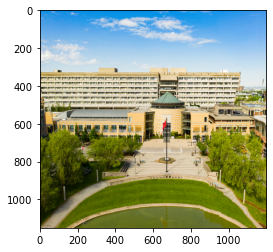

In [351]:
MySeamCarving(york, 1200, 1151) #Seam carving result
#The printed seam carving dimensions should be correct
# The output occurs before the last seam is carved (1201 shown when it is width 1200)

(1728, 1151, 3)
torch.Size([3, 1728, 1151])
torch.Size([1, 3, 1728, 1151])
(1728, 1150, 3)
torch.Size([3, 1728, 1150])
torch.Size([1, 3, 1728, 1150])
(1728, 1149, 3)
torch.Size([3, 1728, 1149])
torch.Size([1, 3, 1728, 1149])
(1728, 1148, 3)
torch.Size([3, 1728, 1148])
torch.Size([1, 3, 1728, 1148])
(1728, 1147, 3)
torch.Size([3, 1728, 1147])
torch.Size([1, 3, 1728, 1147])
(1728, 1146, 3)
torch.Size([3, 1728, 1146])
torch.Size([1, 3, 1728, 1146])
(1728, 1145, 3)
torch.Size([3, 1728, 1145])
torch.Size([1, 3, 1728, 1145])
(1728, 1144, 3)
torch.Size([3, 1728, 1144])
torch.Size([1, 3, 1728, 1144])
(1728, 1143, 3)
torch.Size([3, 1728, 1143])
torch.Size([1, 3, 1728, 1143])
(1728, 1142, 3)
torch.Size([3, 1728, 1142])
torch.Size([1, 3, 1728, 1142])
(1728, 1141, 3)
torch.Size([3, 1728, 1141])
torch.Size([1, 3, 1728, 1141])
(1728, 1140, 3)
torch.Size([3, 1728, 1140])
torch.Size([1, 3, 1728, 1140])
(1728, 1139, 3)
torch.Size([3, 1728, 1139])
torch.Size([1, 3, 1728, 1139])
(1728, 1138, 3)
torch.Siz

0

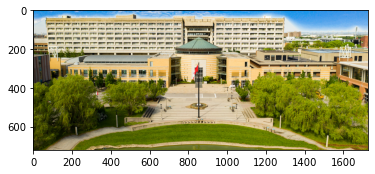

In [352]:
MySeamCarving(york, 1728, 720)

(600, 900, 3)
torch.Size([3, 600, 900])
torch.Size([1, 3, 600, 900])
(600, 899, 3)
torch.Size([3, 600, 899])
torch.Size([1, 3, 600, 899])
(600, 898, 3)
torch.Size([3, 600, 898])
torch.Size([1, 3, 600, 898])
(600, 897, 3)
torch.Size([3, 600, 897])
torch.Size([1, 3, 600, 897])
(600, 896, 3)
torch.Size([3, 600, 896])
torch.Size([1, 3, 600, 896])
(600, 895, 3)
torch.Size([3, 600, 895])
torch.Size([1, 3, 600, 895])
(600, 894, 3)
torch.Size([3, 600, 894])
torch.Size([1, 3, 600, 894])
(600, 893, 3)
torch.Size([3, 600, 893])
torch.Size([1, 3, 600, 893])
(600, 892, 3)
torch.Size([3, 600, 892])
torch.Size([1, 3, 600, 892])
(600, 891, 3)
torch.Size([3, 600, 891])
torch.Size([1, 3, 600, 891])
(600, 890, 3)
torch.Size([3, 600, 890])
torch.Size([1, 3, 600, 890])
(600, 889, 3)
torch.Size([3, 600, 889])
torch.Size([1, 3, 600, 889])
(600, 888, 3)
torch.Size([3, 600, 888])
torch.Size([1, 3, 600, 888])
(600, 887, 3)
torch.Size([3, 600, 887])
torch.Size([1, 3, 600, 887])
(600, 886, 3)
torch.Size([3, 600, 

0

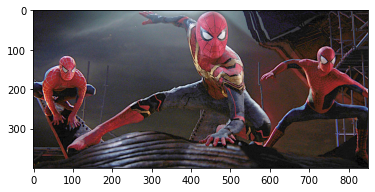

In [356]:
MySeamCarving(spidey, 850, 400)